In [129]:
# Import necessary packages. 
import numpy as np
import pylab as py
import os
import glob
import pdb
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from specutils import Spectrum1D
import stsynphot as stsyn  
import astropy.units as u
import math
from synphot import Observation
import pysynphot as S
global sig_int
import pandas as pd
from scipy import interpolate
from extinction import ccm89, fitzpatrick99, apply

os.chdir("/Users/alexgagliano/Documents/Research/2020oi/data")

In [130]:
Lbol['ph'] = Lbol['MJD'] - t0

In [131]:
MassEstimates = pd.read_csv("StrippedEnvelope_EjectaMassEstimates.csv")
Lbol = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/scripts/superbol/superbol_output_2020oi/logL_bb_2020oi_AUBgVriz.txt", delimiter='\t', names=['MJD', 'logL', 'logLerr'])
bol2020oi = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/bol_2020oi_AUBgVriz_wErr.txt")

In [132]:
Mass_cut = MassEstimates[MassEstimates['SN'].isin(['SN2005em', 'SN2005aw', 'SN2005hg', 'SN2006aj'])]

In [133]:
minsep = np.nanmin(np.nanmax(bol2020oi['L+BB']) - 1.e41*MassEstimates['Lp(10^41erg/s)'])

In [134]:
np.where(np.nanmax(bol2020oi['L+BB']) - 1.e41*MassEstimates['Lp(10^41erg/s)'] == minsep)

(array([10]),)

In [135]:
t0 = 58854.2

In [136]:
Lbol['ph'] = Lbol['MJD'] - t0

In [137]:
MassEstimates['style'] = 0
SN2020oi = pd.DataFrame({'SN':['2020oi'], 'style':[1], 'tp(days)':[11.415999999997439], 'Lp(10^41erg/s)':[(10**42.547)/1.e41], 'Arnett(Msol)':[0.09], 'K&K(Msol)':[0.07], 'Tail(Msol)':[0.04]})
SN2020oi['style'] = 1
MassEstimates = pd.concat([MassEstimates, SN2020oi], ignore_index=True)

In [138]:
SN2010bh = MassEstimates[MassEstimates['SN'] == 'SN2010bh']

In [139]:
np.where(Lbol['logL'] == np.nanmax(Lbol['logL']))

(array([17]),)

In [140]:
np.nanmax(Lbol['logL'])

42.547

In [141]:
Lbol['ph'].values[17]

11.415999999997439

In [142]:
len(MassEstimates)

38

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


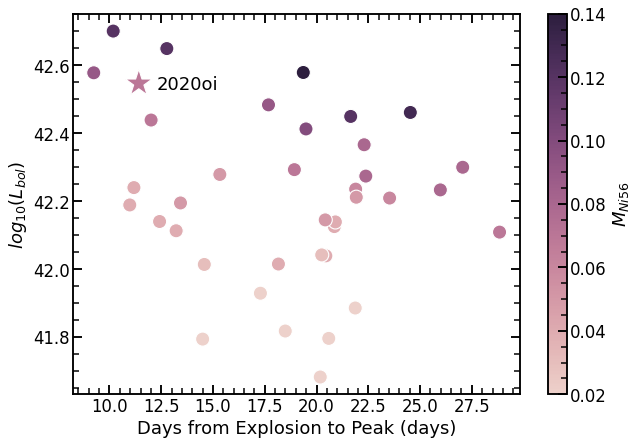

In [170]:
plt.rcParams['xtick.major.size'] = 16
plt.rcParams['ytick.major.size'] = 16

plt.rcParams['xtick.minor.size'] = 8
plt.rcParams['ytick.minor.size'] = 8
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2

plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

peak20oi = 58864.48

markers = np.concatenate([37*['o'], ['*']])
sns.set_context("talk")
plt.figure(figsize=(10,7))
sns.scatterplot(MassEstimates['tp(days)'], np.log10(1.e41*MassEstimates['Lp(10^41erg/s)']), hue=MassEstimates['K&K(Msol)'], style=MassEstimates['style'], markers=['o', '*'], s=600*MassEstimates['style']+200, legend=False, zorder=100)
#plt.plot(SN2010bh['tp(days)'], np.log10(1.e41*SN2010bh['Lp(10^41erg/s)']), '*', c='r', ms=15, zorder=1000, label=r"SN2010bh, $M_{Ni}$ (K&K) = 0.09 $M_{\odot}$")
#plt.plot(bol2020oi['ph']-bol2020oi['ph'].values[0], bol2020oi['L+BB'])
#sns.lineplot(x=Lbol['ph']-Lbol['ph'].values[0]+2, y=Lbol['logL'], ms=1, alpha=0.8,color='k', label='2020oi')
#plt.plot(SN2020oi['tp(days)'], np.log10(1.e41*SN2020oi['Lp(10^41erg/s)']), '*', ms=20,c='r', zorder=1)
#plt.fill_between(Lbol['ph']+2-Lbol['ph'].values[0], Lbol['logL']-Lbol['logLerr']/2,Lbol['logL']+Lbol['logLerr']/2, alpha=0.2,color='k')

#Add 2020oi to the sample but add another point, larger, in background to outline it
sm = plt.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True), norm=plt.Normalize(vmin=np.nanmin(MassEstimates['K&K(Msol)']), vmax=np.nanmax(MassEstimates['K&K(Msol)'])))
sm._A = [];
plt.xlabel("Days from Explosion to Peak (days)")
plt.ylabel(r"$log_{10}$($L_{bol}$)")
cbar = plt.colorbar(sm)
plt.text(12.3, 42.53, "2020oi", c='k')
cbar.set_label(r"$M_{Ni56}$")
plt.savefig("/Users/alexgagliano/Documents/Research/2020oi/img/MNi_vs_RiseTime_2020oi.png",dpi=200, bbox_inches='tight')

In [17]:
## MassEstimates